In [3]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix

In [5]:
Telco_df = pd.read_csv("Telco-Customer-Churn.csv", low_memory=False)

# Modeling

In [11]:
from sklearn.model_selection import train_test_split

y = Telco_df['Churn']
X = Telco_df.loc[:, Telco_df.columns != 'Churn']

X = X.drop(columns="Unnamed: 0")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

## Logistic Regression

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [27]:
lr_gs = LogisticRegression()
parameters = {'C':[1,2,3,4,5], 'random_state': [3]}
lr_gs = GridSearchCV(lr_gs , parameters, cv=4, scoring='f1_weighted', n_jobs=1)
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5], 'random_state': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [28]:
print(lr_gs.best_params_, lr_gs.best_score_)

{'C': 2, 'random_state': 3} 0.798009879821929


In [30]:
from sklearn import metrics

print("Metrics on Training Data")
lrtrain_predict = lr_gs.predict(X_train)
print(metrics.accuracy_score(y_train, lrtrain_predict))
print(confusion_matrix(y_train, lrtrain_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
lrtest_pred = lr_gs.predict(X_test)
print(metrics.accuracy_score(y_test, lrtest_pred))
print(confusion_matrix(y_test,lrtest_pred))

Metrics on Training Data
0.8075464543041335
[[3479  401]
 [ 614  780]]
------------------------------
------------------------------
Metrics on Test Data
0.8071672354948806
[[1137  146]
 [ 193  282]]


## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

n_neighbors = range(1,10)
knn_accuracy = list()
knn_recall = list()

for n in n_neighbors:
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_prediction))
    knn_recall.append(recall_score(y_test, knn_prediction))

Text(0.5,1,'KNN Model - Accuracy, Recall vs Neighbors')

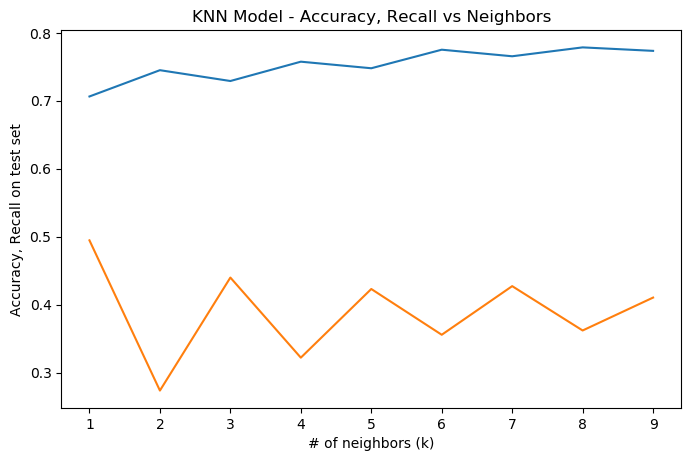

In [55]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(n_neighbors, knn_accuracy)
plt.plot(n_neighbors, knn_recall)
plt.xlabel('# of neighbors (k)')
plt.ylabel('Accuracy, Recall on test set')
plt.title('KNN Model - Accuracy, Recall vs Neighbors')

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


print("Metrics on Training Data")
train_predict = knn.predict(X_train)
print(metrics.accuracy_score(y_train, train_predict))
print(confusion_matrix(y_train, train_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

Metrics on Training Data
0.8606370875995449
[[3614  266]
 [ 469  925]]
------------------------------
------------------------------
Metrics on Test Data
0.7292377701934016
[[1073  210]
 [ 266  209]]


# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.6973833902161547
0.6860068259385665


In [68]:
print(classification_report(y_train, nb.predict(X_train)))
print(confusion_matrix(y_train, nb.predict(X_train)))


             precision    recall  f1-score   support

          0       0.92      0.64      0.76      3880
          1       0.46      0.85      0.60      1394

avg / total       0.80      0.70      0.72      5274

[[2499 1381]
 [ 215 1179]]


In [69]:
print(classification_report(y_test, nb.predict(X_test)))
print(confusion_matrix(y_test, nb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.91      0.63      0.75      1283
          1       0.46      0.84      0.59       475

avg / total       0.79      0.69      0.70      1758

[[807 476]
 [ 76 399]]


## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier

In [63]:
dt_gs = DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth': [1,3,5,6,7,8,9,10], 'max_features': ['auto', 'sqrt'], 'random_state': [3]}
dt_gs = GridSearchCV(dt_gs , parameters, cv=4, scoring='f1_weighted', n_jobs=1)
dt_gs.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt'], 'random_state': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [64]:
print(dt_gs.best_params_, dt_gs.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'random_state': 3} 0.7775881627901319


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(max_depth= 6, criterion = 'entropy' ) #
dt.fit(X_train, y_train)
       
dt_predictions = dt.predict(X_test)

#print(rf.score(X_test, y_test))
scores = cross_val_score(dt, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(metrics.classification_report(y_test, dt_predictions))
print(metrics.confusion_matrix(y_test, dt_predictions))

[0.77840909 0.75284091 0.73295455 0.75213675 0.78632479]
Accuracy: 0.76 (+/- 0.04)

             precision    recall  f1-score   support

          0       0.82      0.88      0.85      1283
          1       0.60      0.49      0.54       475

avg / total       0.76      0.77      0.77      1758

[[1127  156]
 [ 242  233]]


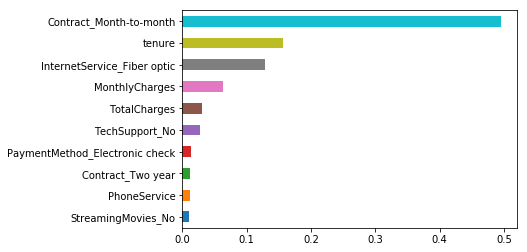

In [66]:
dt_importances = dt.feature_importances_
dt_weights = pd.Series(dt_importances,
                 index=X.columns.values)
dt_weights.sort_values()[-10:].plot(kind = 'barh')

## Random Forest

In [35]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt

from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [93]:
rfgrid = RandomForestClassifier()
parameters = {'criterion':['gini','entropy'], 'n_estimators': [750,800,900,950,1000],'n_jobs':[1,-1],'random_state': [2]}
gridrf = GridSearchCV(rfgrid , parameters, cv=3, scoring='f1_weighted', n_jobs=1)
gridrf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [750, 800, 900, 950, 1000], 'n_jobs': [1, -1], 'random_state': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [94]:
print(gridrf.best_params_, gridrf.best_score_)

{'criterion': 'entropy', 'n_estimators': 950, 'n_jobs': 1, 'random_state': 2} 0.7791444729892728


In [38]:
rf = RandomForestClassifier(n_estimators = 103, criterion = 'entropy')
rf.fit(X_train, y_train)
       
rf_predictions = rf.predict(X_test)

#print(rf.score(X_test, y_test))
scores = cross_val_score(rf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(mt.classification_report(y_test, rf_predictions))
print(mt.confusion_matrix(y_test, rf_predictions))

[0.79261364 0.81818182 0.75       0.79487179 0.78062678]
Accuracy: 0.79 (+/- 0.04)

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1283
          1       0.63      0.49      0.55       475

avg / total       0.77      0.78      0.77      1758

[[1146  137]
 [ 243  232]]


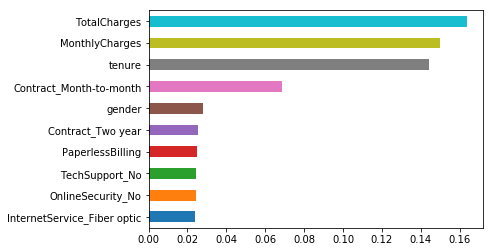

In [48]:
importances = rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## XGBOOSTED 

## SVM

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

param_grid = {'C': [0.1, 1, 2, 3], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1] }
grid = GridSearchCV(svc, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 2, 3], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
print(grid.best_params_, grid.best_score_)

{'C': 1, 'gamma': 0.0001} 0.7836556693211983


In [45]:
from sklearn.svm import SVC  

y_pred = grid.predict(X_test)  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1179  104]
 [ 286  189]]
             precision    recall  f1-score   support

          0       0.80      0.92      0.86      1283
          1       0.65      0.40      0.49       475

avg / total       0.76      0.78      0.76      1758



In [99]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()

param_grid_lin = {'C': [48,49,50,51,52]}
grid_lin = GridSearchCV(svc_lin, param_grid=param_grid_lin, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_lin.fit(X_train,y_train)

print(grid_lin.best_params_, grid_lin.best_score_)

{'C': 50} 0.6637170256611765


In [100]:
from sklearn.svm import SVC  

y_pred = grid_lin.predict(X_test)  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[988 295]
 [127 348]]
             precision    recall  f1-score   support

          0       0.89      0.77      0.82      1283
          1       0.54      0.73      0.62       475

avg / total       0.79      0.76      0.77      1758



In [57]:
from sklearn.svm import SVC

svm_lin = SVC(kernel='linear') 
svm_lin.fit(X_train,y_train)
preds = svm_lin.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.785551763367463

In [58]:
print(confusion_matrix(y_test, preds))  
print(classification_report(y_test, preds)) 

[[1181  102]
 [ 275  200]]
             precision    recall  f1-score   support

          0       0.81      0.92      0.86      1283
          1       0.66      0.42      0.51       475

avg / total       0.77      0.79      0.77      1758

